In [1]:
from model_lomba import *
import matplotlib.pyplot as plt

map_width = 50
map_height = 50
moore = False
model = switching_model(num_of_motorist=50,num_of_stations=10,inv_size=10,cp_size= 10,width=map_width,height=map_height,moore=moore, configuration="more")

#Dalam menit
num_of_step = 30*24*60
#num_of_step = 100
for i in range(num_of_step):
    model.step()

c:\Users\leona\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\leona\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\leona\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


13


In [2]:
#Ambil data agent
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

Position  Charge Alive  Full_battery  Empty_battery  CP_full  \
Step AgentID                                                                
0    0           None  2600.0  None           NaN            NaN      NaN   
     1           None  2600.0  None           NaN            NaN      NaN   
     2           None  2600.0  None           NaN            NaN      NaN   
     3           None  2600.0  None           NaN            NaN      NaN   
     4           None  2600.0  None           NaN            NaN      NaN   

              CP_empty  
Step AgentID            
0    0             NaN  
     1             NaN  
     2             NaN  
     3             NaN  
     4             NaN

In [3]:
motorist_alive = agent_data.xs(num_of_step-1,level = "Step")["Alive"]
motorist_id = []
for motor in model.motorists:
    motorist_id.append(motor.unique_id)
motorist_alive[motorist_id]

AgentID
310    True
311    True
312    True
313    True
314    True
315    True
316    True
317    True
318    True
319    True
320    True
321    True
322    True
323    True
324    True
325    True
326    True
327    True
328    True
329    True
330    True
331    True
332    True
333    True
334    True
335    True
336    True
337    True
338    True
339    True
340    True
341    True
342    True
343    True
344    True
345    True
346    True
347    True
348    True
349    True
350    True
351    True
352    True
353    True
354    True
355    True
356    True
357    True
358    True
359    True
Name: Alive, dtype: object

In [4]:

agent_pos = agent_data.xs(0,level = "Step")["Position"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_pos = agent_pos[station_id]
print(station_pos)

AgentID
360      (0, 0)
361     (49, 0)
362     (0, 49)
363    (49, 49)
364    (24, 24)
365     (24, 0)
366    (24, 49)
367     (0, 24)
368    (49, 24)
369    (11, 11)
370    (11, 36)
371    (36, 11)
372    (36, 36)
Name: Position, dtype: object


In [5]:
step_station = num_of_step-1
#step_station = 0
agent_full = agent_data.xs(step_station,level = "Step")["Full_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_full = agent_full[station_id]
print(station_full)

AgentID
360    10.0
361    10.0
362    10.0
363    10.0
364    10.0
365    10.0
366    10.0
367    10.0
368     9.0
369    10.0
370    10.0
371    10.0
372    10.0
Name: Full_battery, dtype: float64


In [6]:
agent_empty = agent_data.xs(step_station,level = "Step")["Empty_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_empty = agent_empty[station_id]
print(station_empty)

AgentID
360    0.0
361    0.0
362    0.0
363    0.0
364    0.0
365    0.0
366    0.0
367    0.0
368    1.0
369    0.0
370    0.0
371    0.0
372    0.0
Name: Empty_battery, dtype: float64


In [7]:
agent_cp_full = agent_data.xs(step_station,level = "Step")["CP_full"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_full = agent_cp_full[station_id]
print(station_cp_full)

AgentID
360    10.0
361     9.0
362     9.0
363    10.0
364     8.0
365     7.0
366     9.0
367    10.0
368     9.0
369     7.0
370     6.0
371     9.0
372     7.0
Name: CP_full, dtype: float64


In [8]:
agent_cp_empty = agent_data.xs(step_station,level = "Step")["CP_empty"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_empty = agent_cp_empty[station_id]
print(station_cp_empty)

AgentID
360    0.0
361    1.0
362    1.0
363    0.0
364    2.0
365    3.0
366    1.0
367    0.0
368    1.0
369    3.0
370    4.0
371    1.0
372    3.0
Name: CP_empty, dtype: float64


In [9]:
#Ambil data motorist
driver_num = 1
motorist_pos = agent_data.xs(model.motorists[driver_num].unique_id, level = "AgentID")["Position"]
motorist_pos.head()
motorist_pos.tail()

Step
43195     (0, 7)
43196    (49, 7)
43197    (48, 7)
43198    (48, 6)
43199    (47, 6)
Name: Position, dtype: object

Text(0, 0.5, 'y')

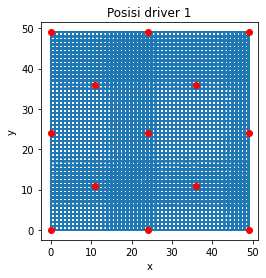

In [10]:
#Coba plot posisi
x_coor = []
y_coor = []
for coor in motorist_pos:
    x_coor.append(coor[0])
    y_coor.append(coor[1])



plt.plot(x_coor,y_coor)
for i in range(model.num_of_stations):
    plt.plot(model.stations[i].pos[0],model.stations[i].pos[1],color = "red", marker = 'o')
plt.xlim([0,map_width])
plt.ylim([0,map_height])
plt.title('Posisi driver ' + str(driver_num))
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')

<AxesSubplot:xlabel='Step'>

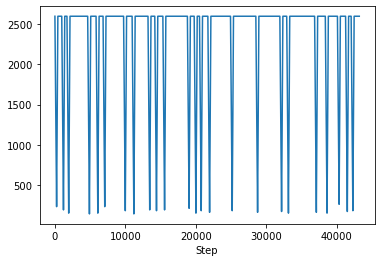

In [11]:
#Cek baterai
battery_id = 0
battery_energy = agent_data.xs(battery_id, level = "AgentID")["Charge"]
battery_energy.plot()



In [12]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.tail()

,num_of_alive
43195,50
43196,50
43197,50
43198,50
43199,50


Text(0.5, 0, 'Steps')

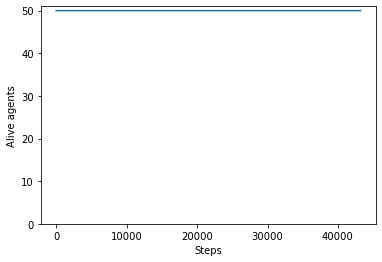

In [13]:
plt.plot(model_data)
plt.ylim([0,51])
plt.ylabel("Alive agents")
plt.xlabel("Steps")